In [1]:
from __future__ import print_function, division
from builtins import range

In [2]:
from keras.models import Sequential

from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

Using TensorFlow backend.


In [3]:
import matplotlib.pyplot as plt

import pandas as pd

import numpy as np

In [5]:
def y2indicator(Y):

  N = len(Y)

  K = len(set(Y))

  I = np.zeros((N, K))

  I[np.arange(N), Y] = 1

  return I
#it should not be list of indexes.it should be one hot encoded.


In [29]:
np.arange(2)

array([0, 1])

In [28]:
import os
os.getcwd()

'C:\\Users\\raobk\\Desktop\\Advanced CV\\fashionmnist'

In [14]:
os.chdir('/Users/raobk/Desktop/Advanced CV/fashionmnist')

In [31]:
data = pd.read_csv('fashion-mnist_train.csv')
data = data.values
np.random.shuffle(data)

In [33]:
data

array([[8, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ..., 
       [6, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [36]:
X = data[:, 1:].reshape(-1, 28, 28, 1) / 255.0#it will convert the images into gray scale and then it will be converted into normalized form

Y = data[:, 0].astype(np.int32)

In [42]:
set(Y)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [43]:
# get shapes

# N = len(Y)

K = len(set(Y))#total classes in the y label

In [44]:
# by default Keras wants one-hot encoded labels

# there's another cost function we can use

# where we can just pass in the integer labels directly

# just like Tensorflow / Theano
#converted into one hot encoded form.

Y = y2indicator(Y)

In [45]:
Y

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [46]:
# the model will be a sequence of layers

model = Sequential()





# make the CNN

# model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(input_shape=(28, 28, 1), filters=32, kernel_size=(3, 3)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D())



model.add(Conv2D(filters=64, kernel_size=(3, 3)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D())



model.add(Conv2D(filters=128, kernel_size=(3, 3)))

model.add(BatchNormalization())

model.add(Activation('relu'))

model.add(MaxPooling2D())



model.add(Flatten())

model.add(Dense(units=300))

model.add(Activation('relu'))

model.add(Dropout(0.2))

model.add(Dense(units=K))

model.add(Activation('softmax'))



In [47]:
# list of losses: https://keras.io/losses/

# list of optimizers: https://keras.io/optimizers/

# list of metrics: https://keras.io/metrics/

model.compile(

  loss='categorical_crossentropy',

  optimizer='adam',

  metrics=['accuracy']

)

In [48]:
# note: multiple ways to choose a backend

# either theano, tensorflow, or cntk

# https://keras.io/backend/





# gives us back a <keras.callbacks.History object at 0x112e61a90>

r = model.fit(X, Y, validation_split=0.33, epochs=15, batch_size=32)

print("Returned:", r)



Train on 40199 samples, validate on 19801 samples
Epoch 1/15
40199/40199 [==============================] - 107s 3ms/step - loss: 0.5061 - acc: 0.8173 - val_loss: 0.4297 - val_acc: 0.8446
Epoch 2/15
40199/40199 [==============================] - 98s 2ms/step - loss: 0.3557 - acc: 0.8680 - val_loss: 0.3825 - val_acc: 0.8616
Epoch 3/15
40199/40199 [==============================] - 103s 3ms/step - loss: 0.3051 - acc: 0.8869 - val_loss: 0.4420 - val_acc: 0.8380
Epoch 4/15
40199/40199 [==============================] - 102s 3ms/step - loss: 0.2726 - acc: 0.8983 - val_loss: 0.3435 - val_acc: 0.8822
Epoch 5/15
40199/40199 [==============================] - 97s 2ms/step - loss: 0.2427 - acc: 0.9093 - val_loss: 0.3425 - val_acc: 0.8772
Epoch 6/15
40199/40199 [==============================] - 98s 2ms/step - loss: 0.2194 - acc: 0.9173 - val_loss: 0.3214 - val_acc: 0.8850
Epoch 7/15
40199/40199 [==============================] - 98s 2ms/step - loss: 0.1975 - acc: 0.9253 - val_loss: 0.3363 - val_

In [50]:

# print the available keys

# should see: dict_keys(['val_loss', 'acc', 'loss', 'val_acc'])

print(r.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


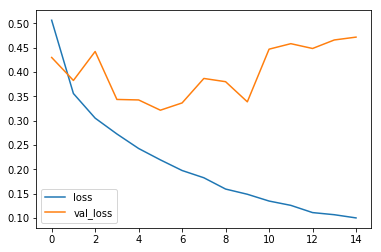

In [51]:

# plot some data

plt.plot(r.history['loss'], label='loss')

plt.plot(r.history['val_loss'], label='val_loss')

plt.legend()

plt.show()

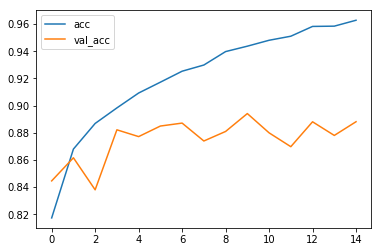

In [52]:
# accuracies

plt.plot(r.history['acc'], label='acc')

plt.plot(r.history['val_acc'], label='val_acc')

plt.legend()

plt.show()

In [3]:
import util

ModuleNotFoundError: No module named 'util'